In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# グラフプロット用基準関数
def f(x1,x2,x3):
    y = x1**2+x2**2+x3**2-10*np.cos(2*np.pi*x1)-10*np.cos(2*np.pi*x2)-10*np.cos(2*np.pi*x3)+30
    return y                                                                                        

In [3]:
# 基準関数の微分
def df(x1, x2, x3):
    dzdx1 = 2*x1+20*np.pi*np.sin(2*np.pi*x1)
    dzdx2 = 2*x2+20*np.pi*np.sin(2*np.pi*x2)
    dzdx3 = 2*x2+20*np.pi*np.sin(2*np.pi*x3)
    dy = np.array([dzdx3, dzdx2,dzdx3])
    return dy

In [4]:
# 勾配降下法に必要なパラメータ
eta = 0.001                           # 学習率
max_iteration = 40                  # 最大反復回数
x10 = 0                              # 初期値x0
x20 = 0
x30 = 0
x1_pred = [x10]                       # 描画用x0軌跡リスト(初期値をプリセット)
x2_pred = [x20]
x3_pred = [x30]
y_pred = f(x10,x20,x30)

In [5]:
# 最大反復回数まで計算する
for i in range(max_iteration):
    x10,x20,x30 = np.array([x10, x20, x30]) - eta * df(x10, x20, x30)          # 勾配降下法
    x1_pred.append(x10)               # x0の軌跡をリストに追加
    x2_pred.append(x20)              
    x3_pred.append(x30)
x1_pred = np.array(x1_pred)           # 描画用にx0をnumpy配列変換
x2_pred = np.array(x2_pred)           # 描画用にx0をnumpy配列変換
x3_pred = np.array(x3_pred) 
y_pred = f(x1_pred, x2_pred, x3_pred)          # 軌跡のz値を計算

In [6]:
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

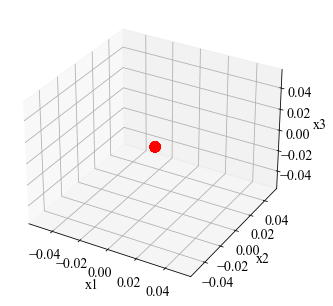

In [7]:
#  グラフの入れ物を用意する。
fig = plt.figure()
ax1 = Axes3D(fig)

# 軸のラベルを設定する。
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('x3')
ax1.scatter3D(x1_pred, x2_pred, x3_pred, label='gd', color='red', s=100)

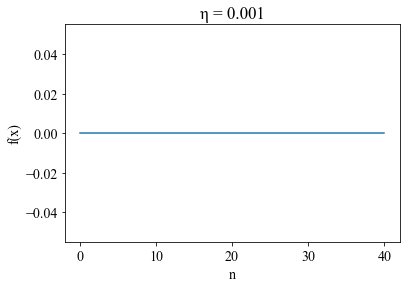

In [17]:
n = np.arange(0,max_iteration+1, 1)
plt.title('η = 0.001')
plt.xlabel("n")
plt.ylabel("f(x)")
plt.plot(n,y_pred)